In [1]:
from dataLoader import yfDataLoader

In [2]:
loader = yfDataLoader("AAPL")

calls, puts = loader.get_option_chain()

In [3]:
calls.pivot(index="maturity", columns="forwardMoneyness", values="impliedVolatility")

forwardMoneyness,-0.298986,-0.297613,-0.297124,-0.293142,-0.289942,-0.288833,-0.287020,-0.285924,-0.285054,-0.284317,...,0.289029,0.289833,0.290636,0.291066,0.291440,0.292358,0.294241,0.295721,0.297493,0.298222
maturity,,,,,,,,,,,,,,,,,,,,,
0.013699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.875001,NaN,NaN,NaN,NaN
0.035616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.51563,NaN,NaN,NaN,NaN,NaN
0.054795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.480474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.073973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.423834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.093151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765139,...,0.375006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.112329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.131507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.68262,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.227397,NaN,NaN,NaN,NaN,0.565678,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.304110,NaN,NaN,NaN,0.526982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290534


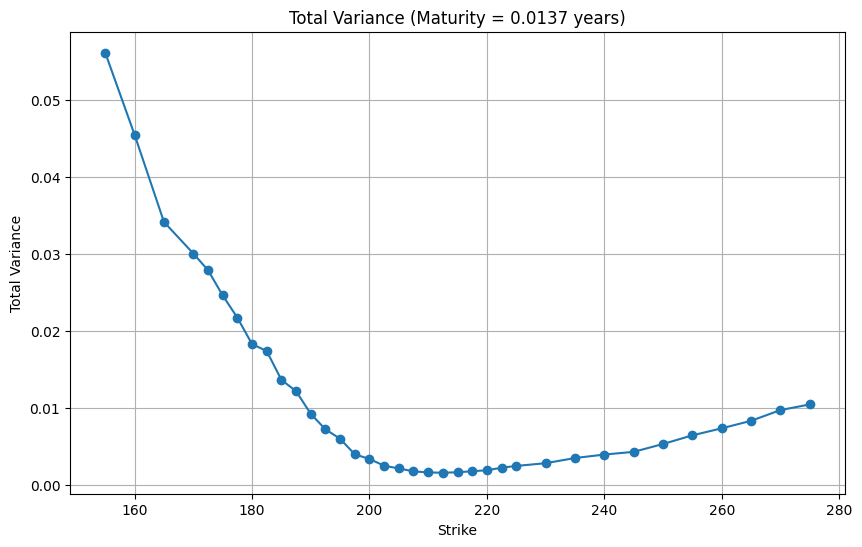

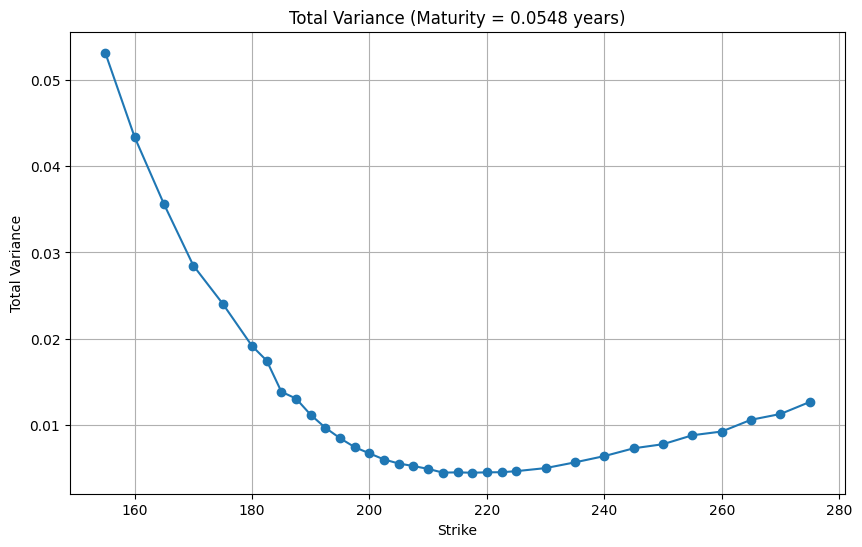

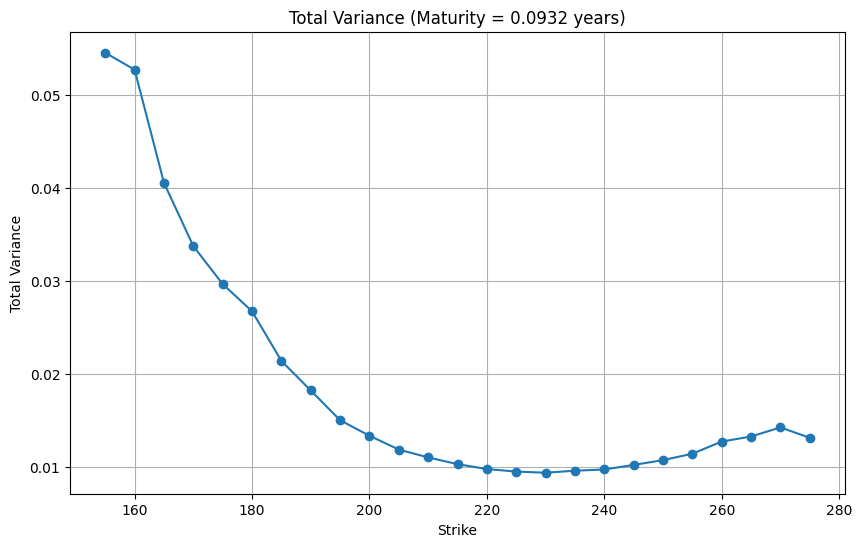

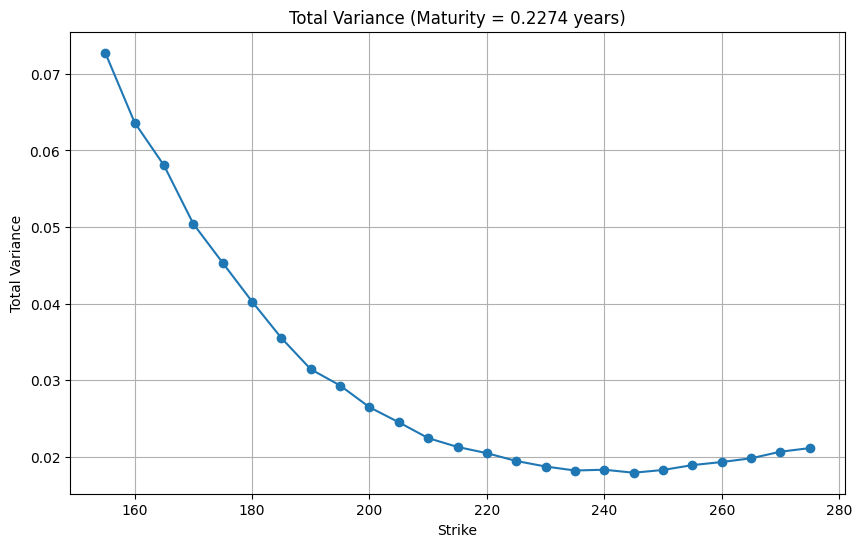

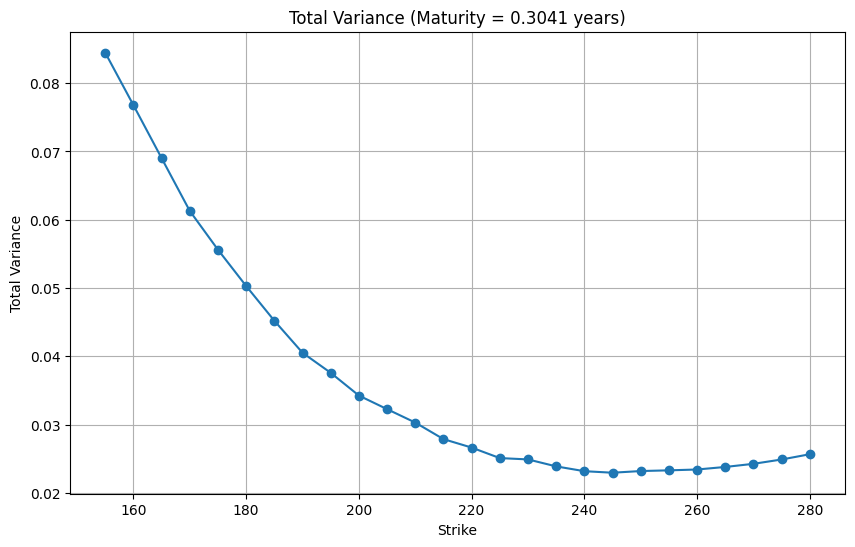

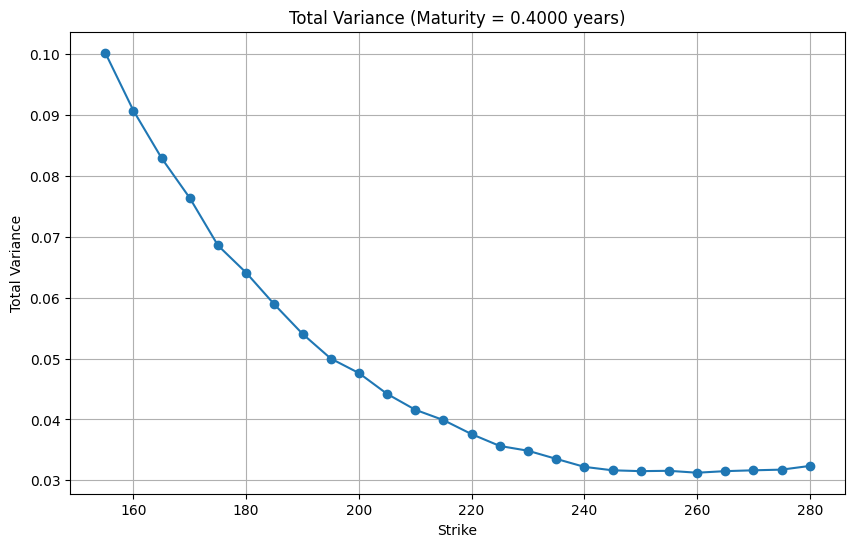

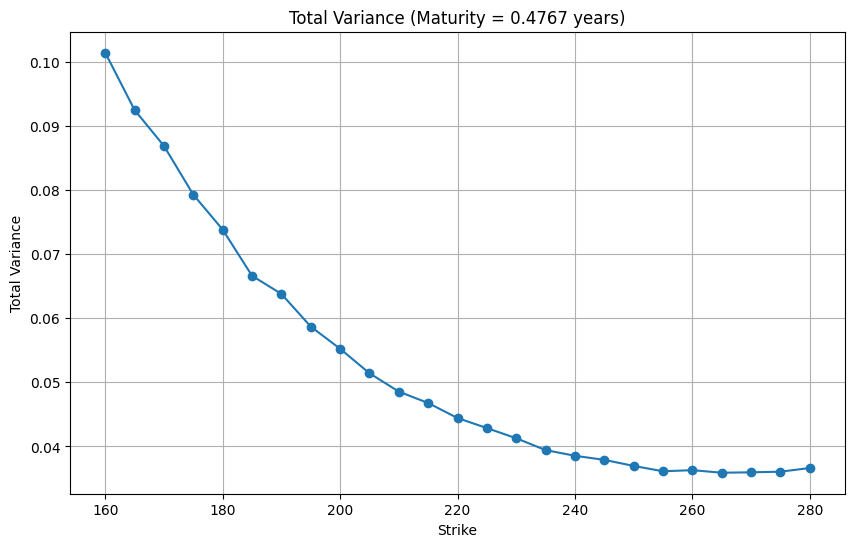

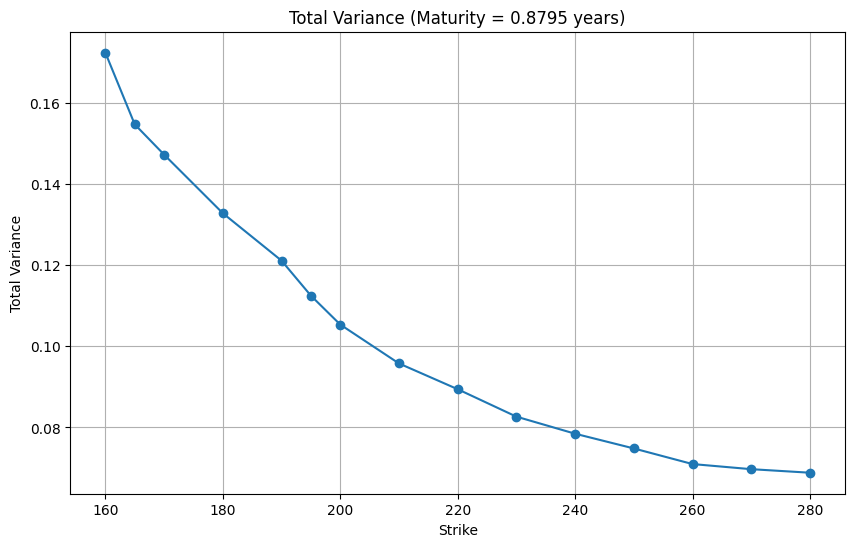

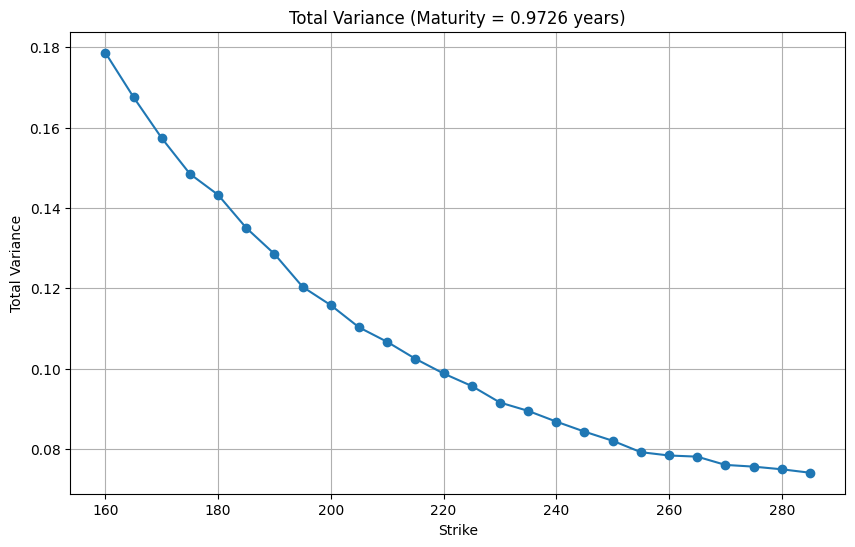

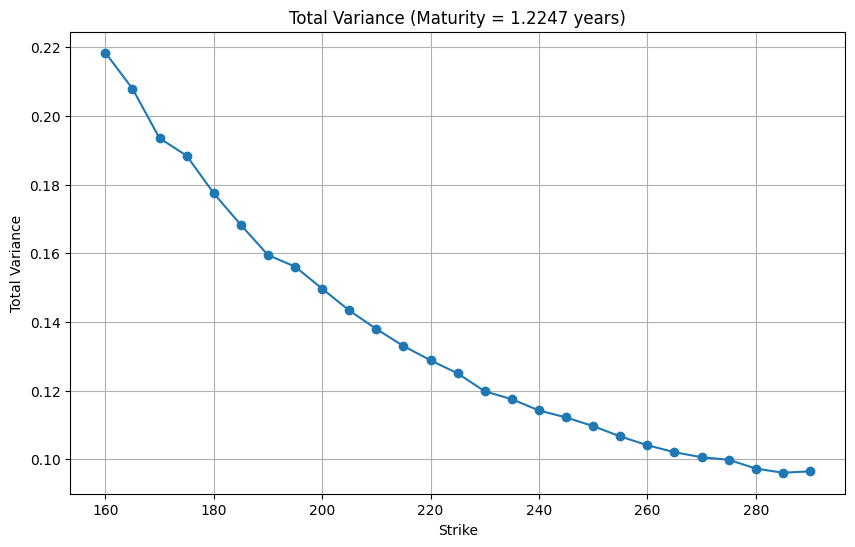

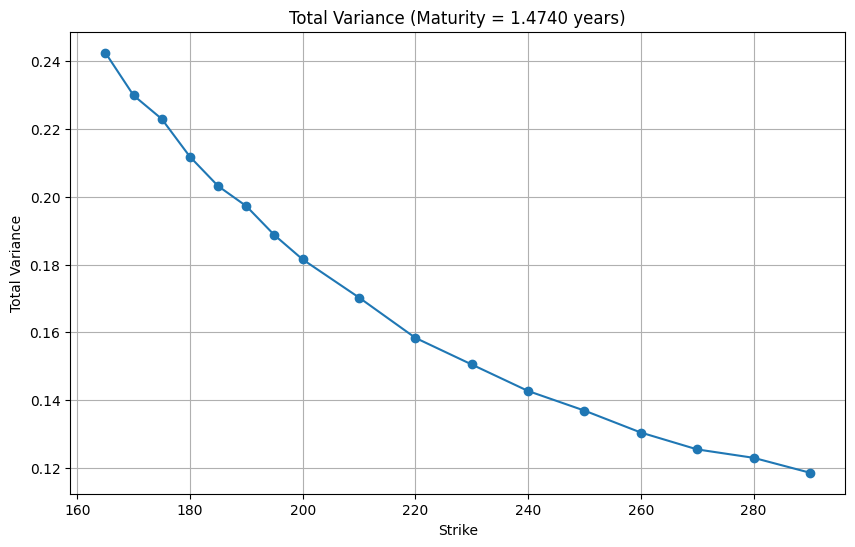

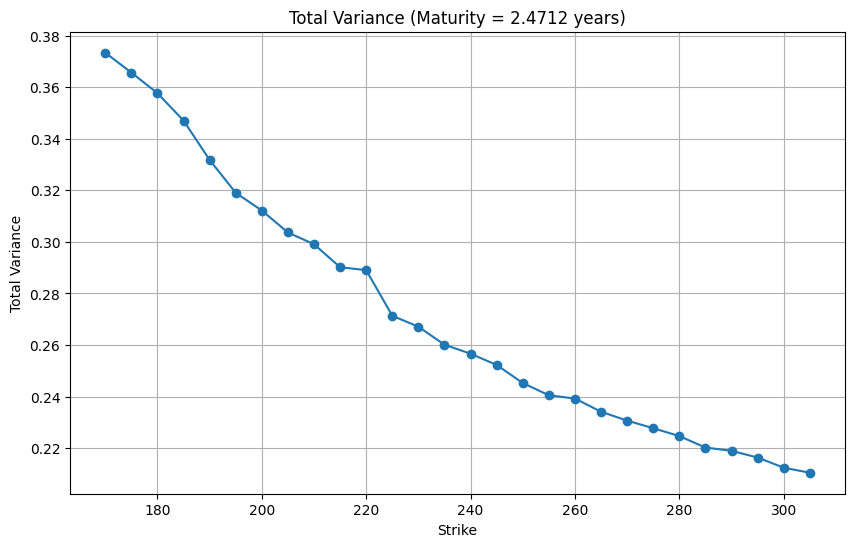

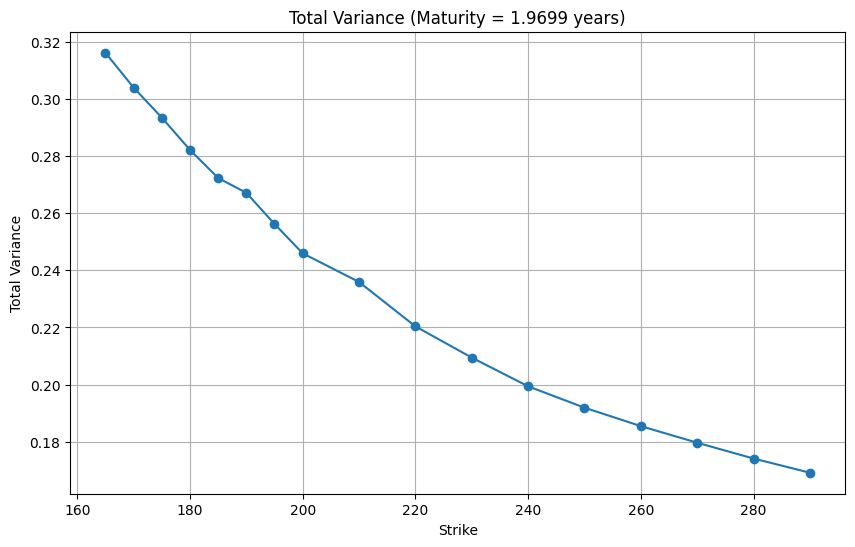

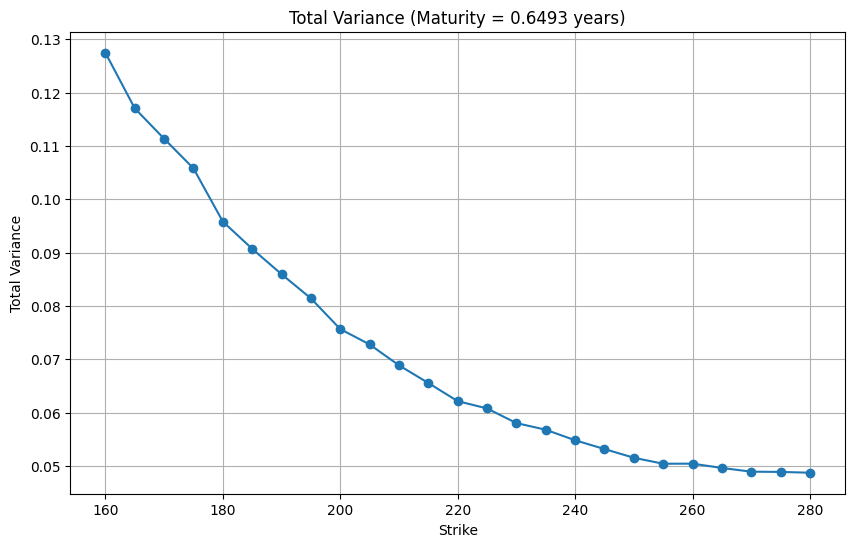

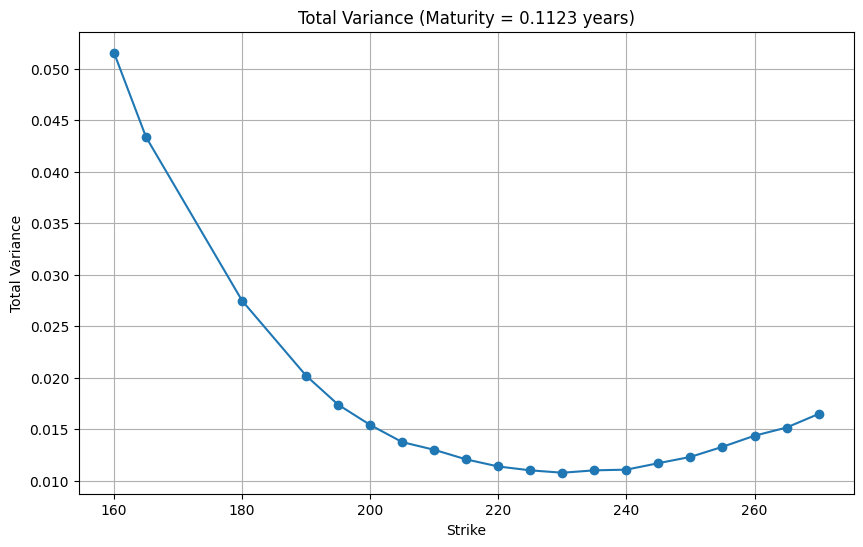

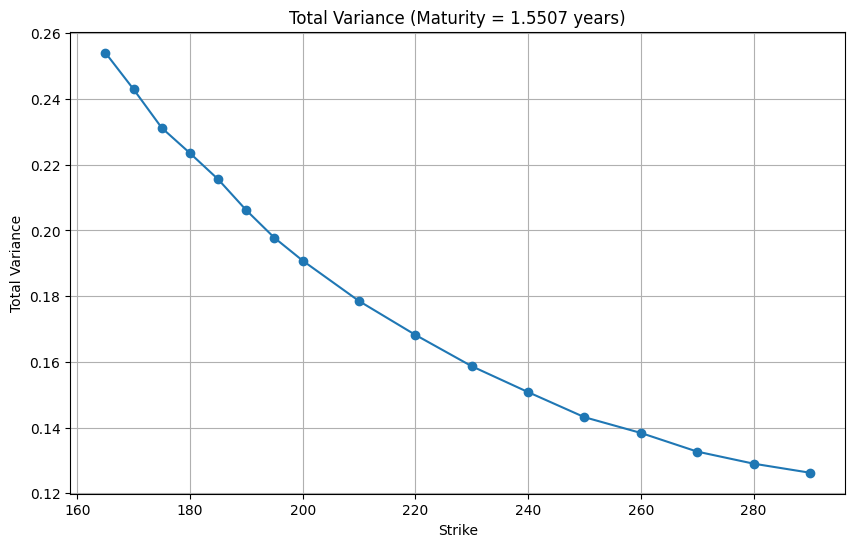

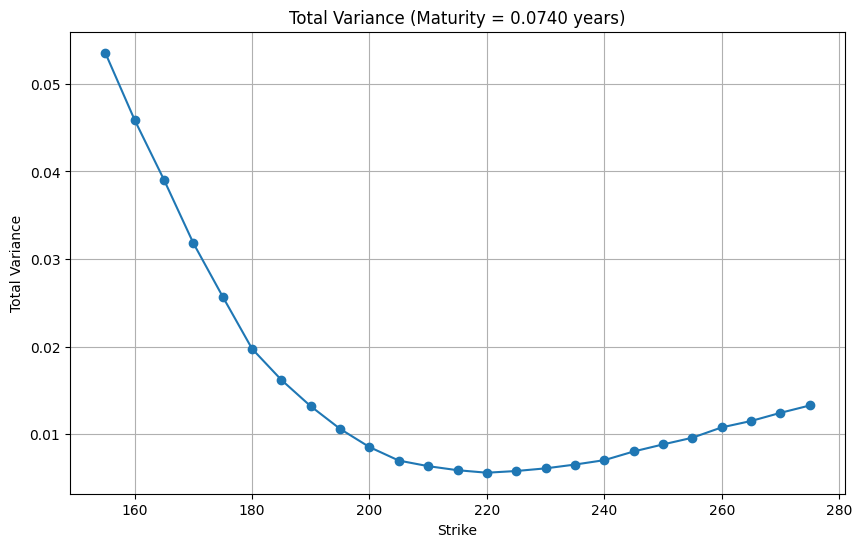

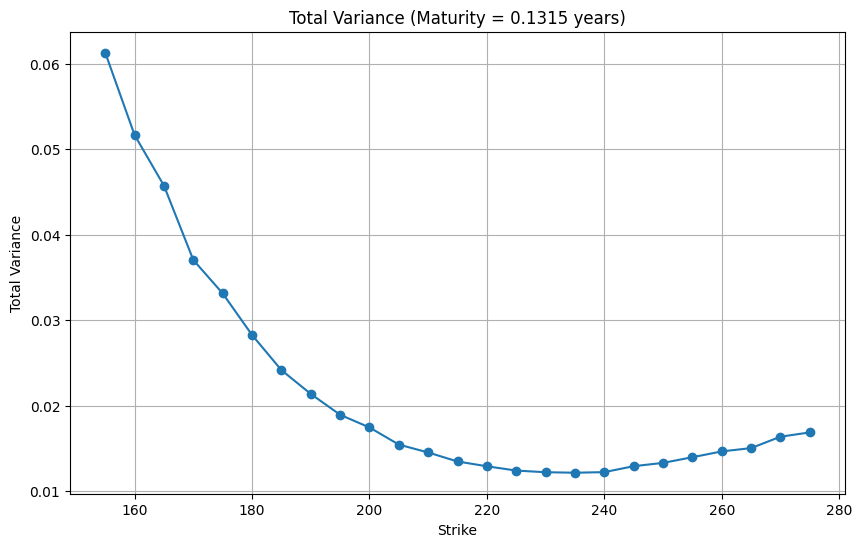

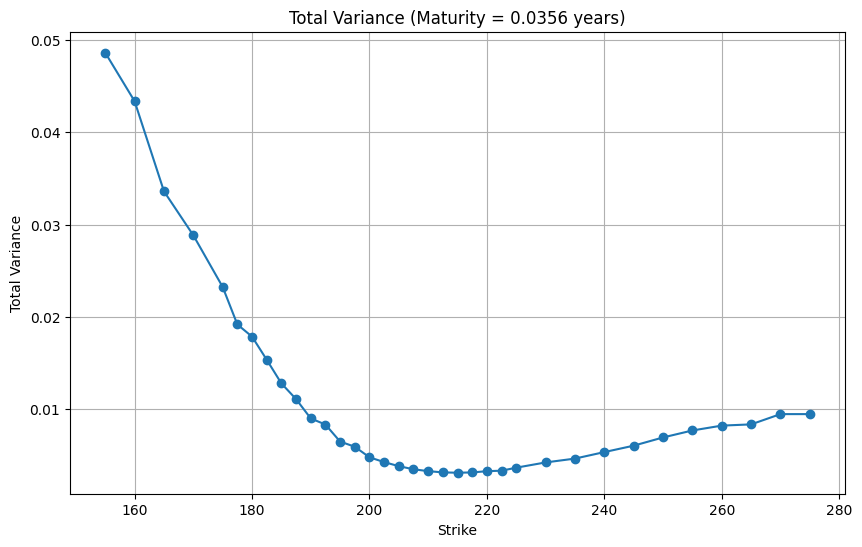

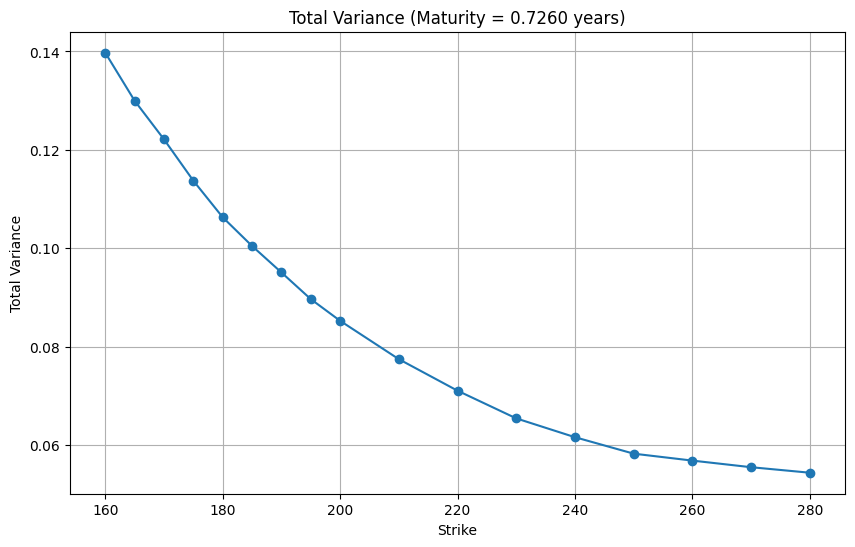

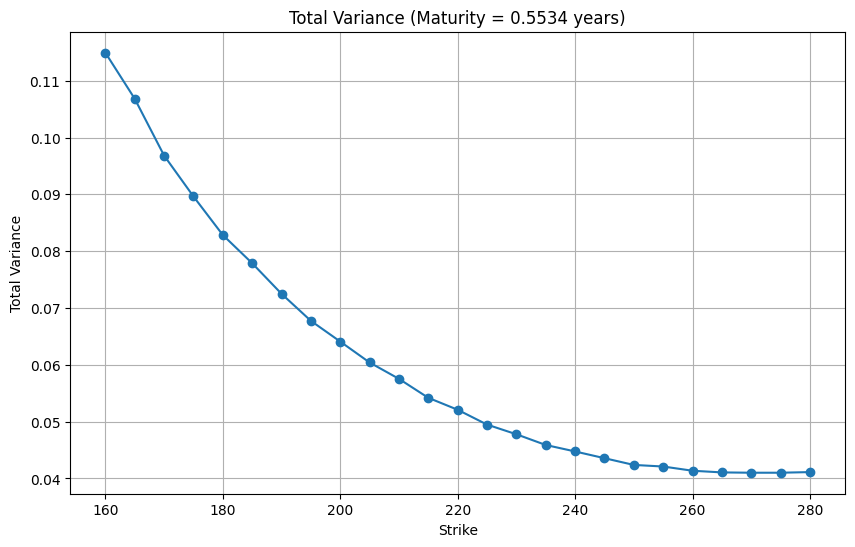

In [4]:
import matplotlib.pyplot as plt
import numpy as np

for target_maturity in set(calls["maturity"]):
    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_calls["strike"], filtered_calls["totalVariance"], marker='o', linestyle='-')
    plt.title(f"Total Variance (Maturity = {target_maturity:.4f} years)")
    plt.xlabel("Strike")
    plt.ylabel("Total Variance")
    plt.grid(True)
    plt.show()

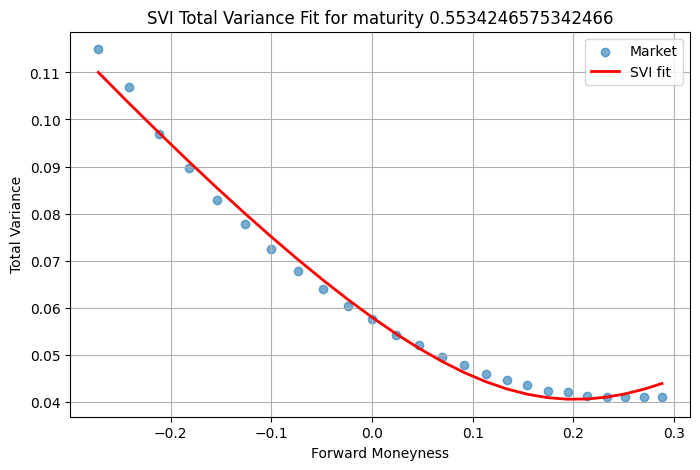

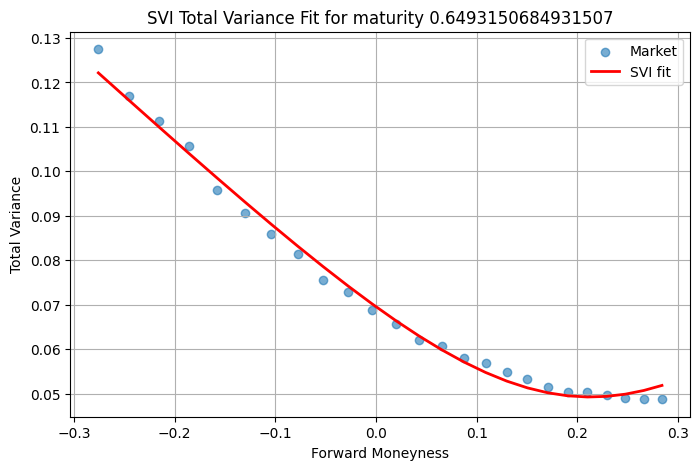

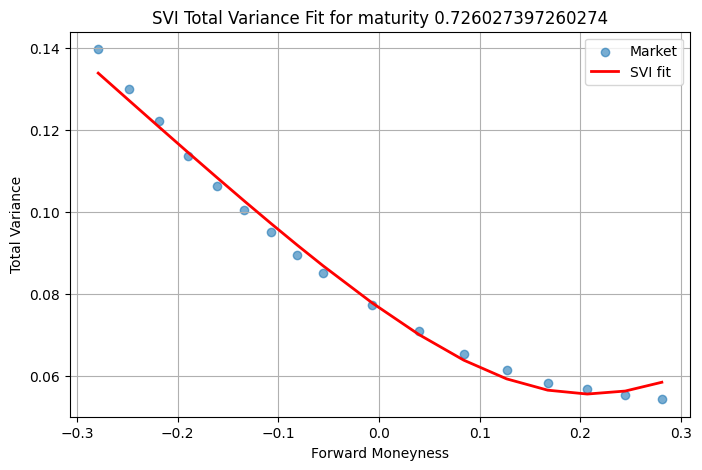

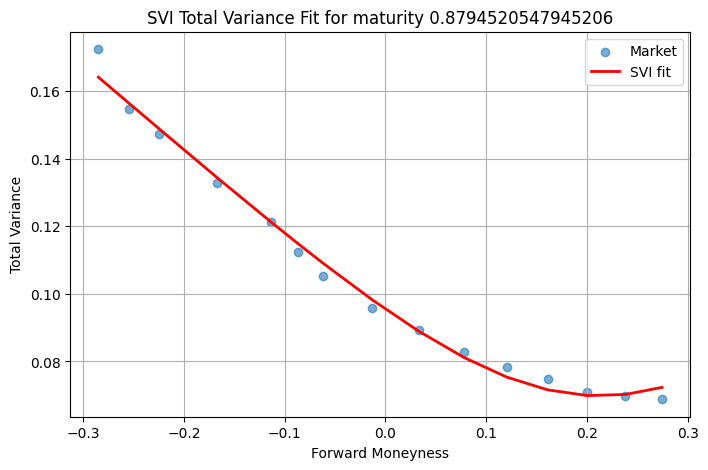

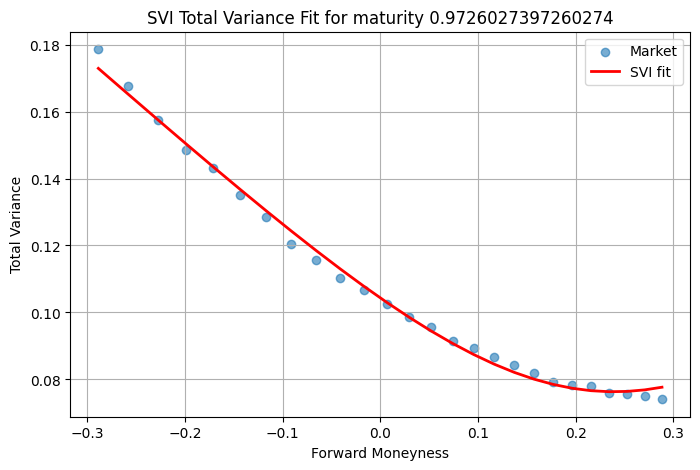

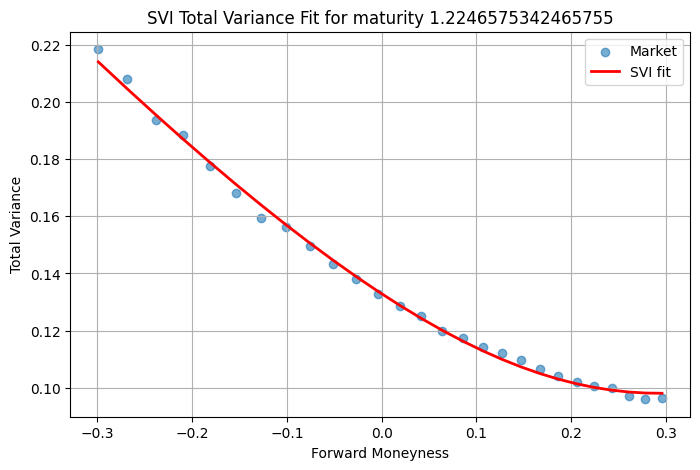

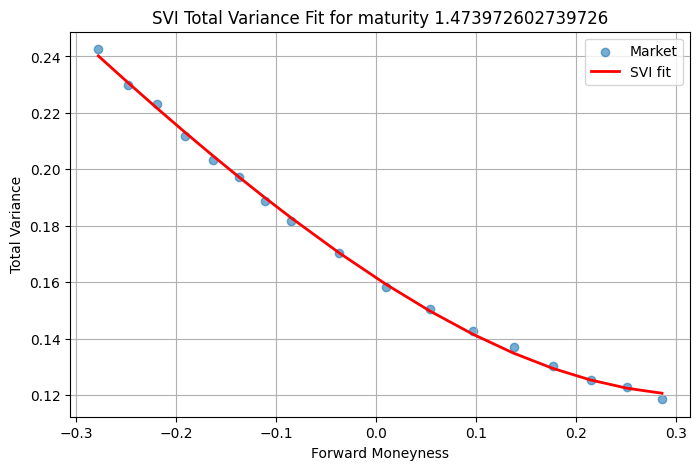

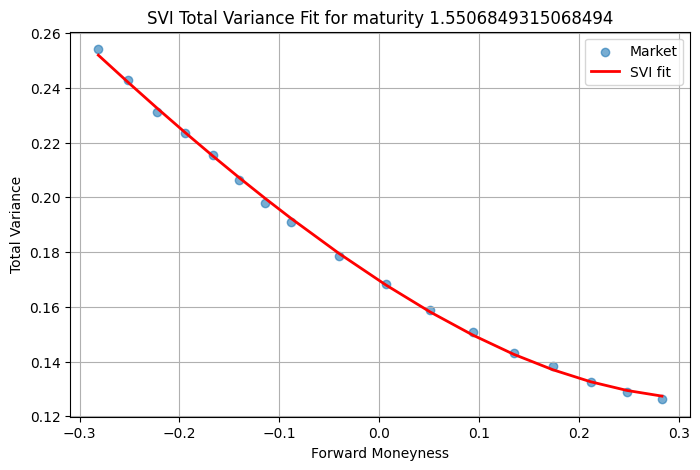

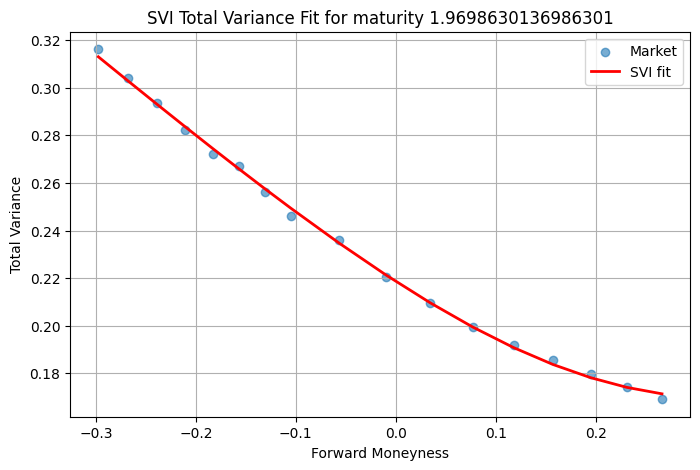

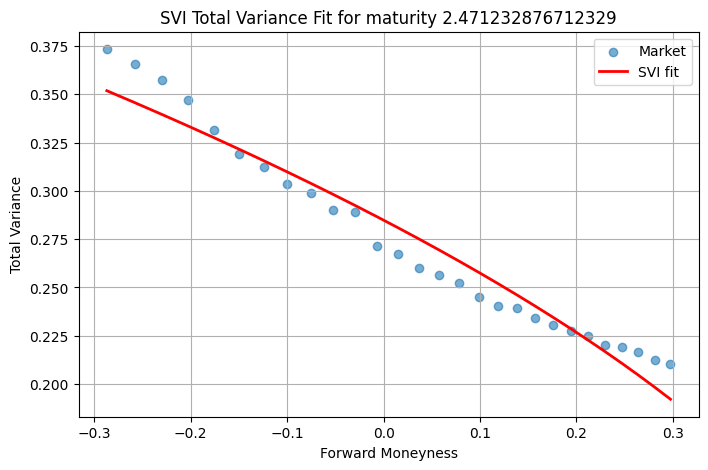

In [5]:
from svioptimizer import SVI
from enums import SVIParameterizationType

maturities = sorted(set(calls[calls["maturity"] >= 0.5]["maturity"]))

for target_maturity in maturities:

    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    svimodel = SVI(SVIParameterizationType.RAW, [0.01, 0.01, 0.01, 0.01, 0.01])

    svimodel.optimize(filtered_calls["forwardMoneyness"].values, filtered_calls["totalVariance"].values)

    x = filtered_calls["forwardMoneyness"].values
    y = filtered_calls["totalVariance"].values
    y_fit = svimodel.evaluate(x)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Market", alpha=0.6)
    plt.plot(x, y_fit, color="red", label="SVI fit", linewidth=2)
    plt.xlabel("Forward Moneyness")
    plt.ylabel("Total Variance")
    plt.title(f"SVI Total Variance Fit for maturity {target_maturity}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
import pandas as pd
surface = calls.pivot(index="forwardMoneyness", columns="maturity", values="impliedVolatility")

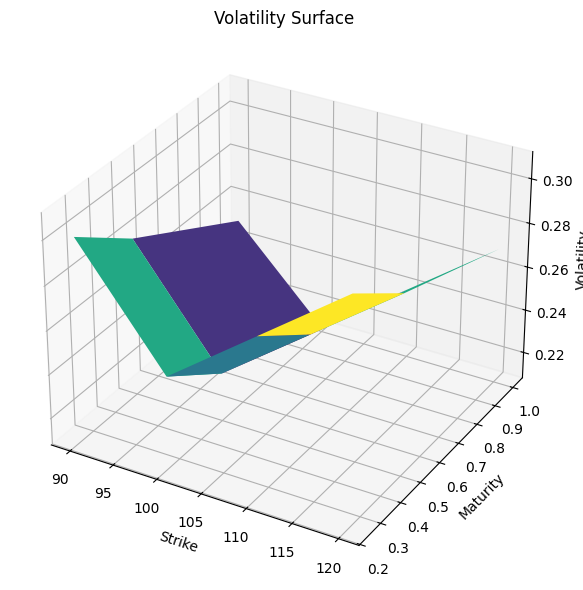

In [7]:
from vola_surface import VolatilitySurface

strikes = [90, 100, 110, 120]
maturities = [0.25, 0.5, 1.0]
vol_matrix = [
    [0.30, 0.28, 0.25],
    [0.25, 0.23, 0.21],
    [0.28, 0.26, 0.24],
    [0.31, 0.29, 0.27],
]

vol_surface = VolatilitySurface(strikes, maturities, vol_matrix)

vol_surface.plot_surface()

In [8]:
calls

,contractSymbol,strike,impliedVolatility,volume,maturity,riskFreeRate,forwardMoneyness,totalVariance
0,AAPL250703C00155000,155.0,2.023931,1.0,0.013699,0.041900,-0.280988,0.056114
1,AAPL250703C00160000,160.0,1.821778,3.0,0.013699,0.041900,-0.249239,0.045464
2,AAPL250703C00165000,165.0,1.579104,21.0,0.013699,0.041900,-0.218467,0.034158
3,AAPL250703C00170000,170.0,1.481448,17.0,0.013699,0.041900,-0.188614,0.030064
4,AAPL250703C00172500,172.5,1.427249,12.0,0.013699,0.041900,-0.174016,0.027905
...,...,...,...,...,...,...,...,...
511,AAPL271217C00285000,285.0,0.298530,1.0,2.471233,0.040053,0.229670,0.220237
512,AAPL271217C00290000,290.0,0.297660,56.0,2.471233,0.040053,0.247062,0.218955
513,AAPL271217C00295000,295.0,0.295890,5.0,2.471233,0.040053,0.264156,0.216359
514,AAPL271217C00300000,300.0,0.293174,153.0,2.471233,0.040053,0.280964,0.212405
